<a href="https://colab.research.google.com/github/Vishu-Gupta/MLProjects/blob/main/01Kaggle%20Projects/08%20Titanic_Reminensce/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This is a Kaggle Getting started notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 20.8MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!rm titanic.zip

## 01 Importing the Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 02 Loading dataset and prep

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
df_train.shape

(891, 12)

In [10]:
df_test.shape

(418, 11)

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
# data types look correct. Now check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
features = list(df_test.columns)

In [19]:
features.remove('Cabin')

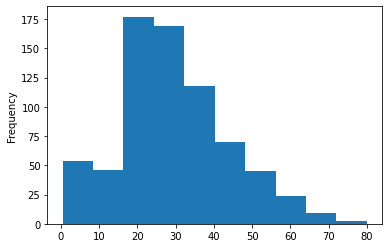

In [22]:
df_train['Age'].plot(kind='hist')

In [21]:
df_train['Age'].min()

0.42

In [23]:
impute = {}
impute['Age'] = df_train['Age'].median()

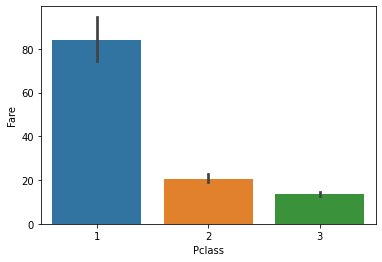

In [24]:
sns.barplot(data=df_train,x='Pclass',y='Fare')

In [29]:
df_train[(df_train['Pclass']==1) & (df_train['Fare']==0)].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [30]:
df_train.iloc[260:266]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S


In [31]:
df_train.iloc[630:635]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S


In [36]:
fares = df_train.groupby('Pclass')['Fare'].median()

In [40]:
list(fares.index)

[1, 2, 3]

In [42]:
for Pclass in list(fares.index):
  impute['fare'+str(Pclass)] = fares[Pclass]

In [43]:
impute

{'Age': 28.0, 'fare1': 60.287499999999994, 'fare2': 14.25, 'fare3': 8.05}

In [44]:
impute['Embarked'] = df_train['Embarked'].mode()[0]

In [45]:
impute

{'Age': 28.0,
 'Embarked': 'S',
 'fare1': 60.287499999999994,
 'fare2': 14.25,
 'fare3': 8.05}

In [46]:
df_train['Age'].fillna(impute['Age'],inplace=True)

In [47]:
df_test['Age'].fillna(impute['Age'],inplace=True)

In [49]:
df_train['Embarked'].fillna(impute['Embarked'],inplace=True)

In [50]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [52]:
df_test['Fare'].fillna(impute['fare3'],inplace=True)

In [53]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [54]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [55]:
features

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [56]:
features.remove('PassengerId')
features.remove('Name')

In [57]:
df_train[features].head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [58]:
df_train[features].nunique()

Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [59]:
features.remove('Ticket')

In [61]:
df_train['Sex_female'] = df_train['Sex'].apply(lambda x : 1 if x=='female' else 0)
df_test['Sex_female'] = df_test['Sex'].apply(lambda x : 1 if x=='female' else 0)

In [62]:
features.remove('Sex')
features.append('Sex_female')

In [69]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Embarked'],drop_first=True)],axis=1)

In [70]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['Embarked'])],axis=1)

In [71]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Q', 'S'],
      dtype='object')

In [72]:
df_test.drop('C',axis=1,inplace=True)

In [73]:
features.remove('Embarked')
features = features+['Q','S']

In [74]:
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Q', 'S']

In [75]:
X = df_train[features].copy()
y = df_train['Survived'].copy()

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X,y,train_size=0.8,random_state=42)

In [77]:
X_train.shape

(712, 8)

In [78]:
X_validate.shape

(179, 8)

In [79]:
y_train.shape

(712,)

## 03 Modelling Start

#### 01 Logistic Regression

In [87]:
import statsmodels.api as sm
model_lr = sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
result = model_lr.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.10
Date:                Sun, 13 Mar 2022   Deviance:                       638.21
Time:                        19:45:47   Pearson chi2:                     712.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0407      0.567      3.602      0.000       0.930       3.151
Pclass        -0.9729      0.157     -6.190      0.000      -1.281      -0.665
Age           -0.0313      0.009     -3.620      0.000      -0.048      -0.014
SibSp         -0.3046      0.115     -2.659      0.008      -0.529      -0.080
Parch         -0.1260      0.136     -0.923      0.356      -0.393       0.141
Fare           0.0024      0.003      0.928      0.353      -0.003       0.007
Sex_female     2.7245      0.222     12.277      0.000       2.290       3.159
Q             -0.1701      0.435     -0.391      0.696      -1.023       0.683
S             -0.4368      0.268     -1.629      0.103      -0.962       0.089
==============================================================================
"""

In [81]:
features2 = list(set(features)-{'Parch','Fare','Q','S'})

In [88]:
model_lr2 = sm.GLM(y_train,sm.add_constant(X_train[features2]),family=sm.families.Binomial())
result2 = model_lr2.fit()
result2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.83
Date:                Sun, 13 Mar 2022   Deviance:                       643.67
Time:                        19:45:50   Pearson chi2:                     721.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9951      0.463      4.305      0.000       1.087       2.903
SibSp         -0.3381      0.108     -3.121      0.002      -0.550      -0.126
Age           -0.0321      0.008     -3.782      0.000      -0.049      -0.015
Pclass        -1.0692      0.132     -8.126      0.000      -1.327      -0.811
Sex_female     2.7053      0.214     12.670      0.000       2.287       3.124
==============================================================================
"""

In [86]:
df_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [89]:
y_train_pred = result2.predict(sm.add_constant(X_train[features2]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
y_validate_pred = result2.predict(sm.add_constant(X_validate[features2]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [98]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,RocCurveDisplay

<Figure size 1440x720 with 0 Axes>

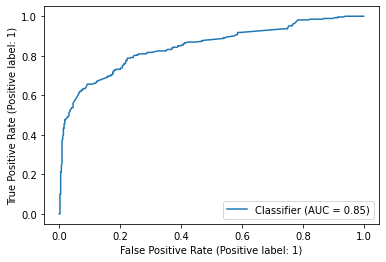

In [99]:
plt.figure(figsize=(20,10))
plt.title('Training')
RocCurveDisplay.from_predictions(y_train,y_train_pred)


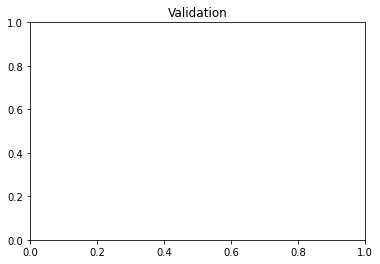

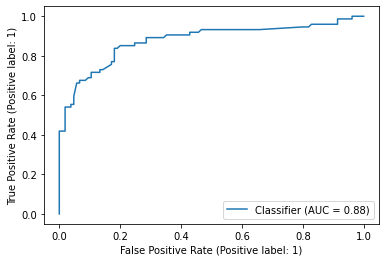

In [102]:
plt.title('Validation')
RocCurveDisplay.from_predictions(y_validate,y_validate_pred)

In [103]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train,y_train_pred)

In [104]:
tuning = pd.DataFrame(fpr,columns=['fpr'])
tuning['tpr'] = tpr
tuning['threhold'] = thresholds

In [105]:
tuning.head()

,fpr,tpr,threhold
0,0.000000,0.000000,1.961904
1,0.002252,0.000000,0.961904
2,0.002252,0.003731,0.958873
3,0.002252,0.011194,0.957586
4,0.002252,0.018657,0.950559


In [106]:
thresholds.max()

1.961904101671716

In [109]:
tuning['diff'] =tuning['tpr']-tuning['fpr']
best_threshold = tuning['diff'].max()

In [110]:
best_threshold

0.5643740755681055

In [111]:
df_train['lr_pred_prob'] = result2.predict(sm.add_constant(df_train[features2]))
df_test['lr_pred_prob'] = result2.predict(sm.add_constant(df_test[features2]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
df_train['lr_pred'] = df_train['lr_pred_prob'].apply(lambda x: 1 if x>=best_threshold else 0)
df_test['lr_pred'] = df_test['lr_pred_prob'].apply(lambda x: 1 if x>=best_threshold else 0)

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_train['Survived'],df_train['lr_pred'])

In [115]:
cm

array([[502,  47],
       [122, 220]])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(df_train['Survived'],df_train['lr_pred'])

0.8103254769921436

In [118]:
df_test[['PassengerId','lr_pred']].rename(columns={'lr_pred':'Survived'}).to_csv('Submission.csv',index=False)

In [119]:
!kaggle competitions submit titanic -f Submission.csv -m "Reminensce with Logistic Regression"

100% 2.77k/2.77k [00:00<00:00, 5.99kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster